In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
raw = pd.read_csv(r'C:\market_data\USDJPY_M15.csv')

In [10]:
raw

,<TICKER>,<DTYYYYMMDD>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,USDJPY,20191230,0,109.435,109.447,109.371,109.409,1990310000
1,USDJPY,20191230,15,109.410,109.422,109.395,109.420,1065990000
2,USDJPY,20191230,30,109.420,109.421,109.387,109.409,1015260000
3,USDJPY,20191230,45,109.409,109.451,109.388,109.428,2139280000
4,USDJPY,20191230,100,109.427,109.427,109.397,109.397,602150000
...,...,...,...,...,...,...,...,...
150059,USDJPY,20260105,2245,156.411,156.511,156.410,156.511,457680000
150060,USDJPY,20260105,2300,156.511,156.573,156.476,156.513,783740000
150061,USDJPY,20260105,2315,156.514,156.545,156.506,156.545,494730000
150062,USDJPY,20260105,2330,156.544,156.593,156.529,156.577,435480000


In [78]:
print(raw.head())


                    <TICKER>  <DTYYYYMMDD>  <TIME>   <OPEN>   <HIGH>    <LOW>  \
datetime                                                                        
2019-12-30 00:00:00   USDJPY      20191230       0  109.435  109.447  109.371   
2019-12-30 00:15:00   USDJPY      20191230      15  109.410  109.422  109.395   
2019-12-30 00:30:00   USDJPY      20191230      30  109.420  109.421  109.387   
2019-12-30 00:45:00   USDJPY      20191230      45  109.409  109.451  109.388   
2019-12-30 01:00:00   USDJPY      20191230     100  109.427  109.427  109.397   

                     <CLOSE>       <VOL>  
datetime                                  
2019-12-30 00:00:00  109.409  1990310000  
2019-12-30 00:15:00  109.420  1065990000  
2019-12-30 00:30:00  109.409  1015260000  
2019-12-30 00:45:00  109.428  2139280000  
2019-12-30 01:00:00  109.397   602150000  


In [79]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 150064 entries, 2019-12-30 00:00:00 to 2026-01-05 23:45:00
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   <TICKER>      150064 non-null  object 
 1   <DTYYYYMMDD>  150064 non-null  int64  
 2   <TIME>        150064 non-null  int64  
 3   <OPEN>        150064 non-null  float64
 4   <HIGH>        150064 non-null  float64
 5   <LOW>         150064 non-null  float64
 6   <CLOSE>       150064 non-null  float64
 7   <VOL>         150064 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 14.3+ MB


In [80]:
data = pd.DataFrame(raw['<CLOSE>'])

In [81]:
data.rename(columns={'<CLOSE>': 'price'}, inplace=True)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 150064 entries, 2019-12-30 00:00:00 to 2026-01-05 23:45:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   price   150064 non-null  float64
dtypes: float64(1)
memory usage: 6.3 MB


In [107]:
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()

In [108]:
data.tail()

,price,SMA1,SMA2,position
datetime,,,,
2026-01-05 22:45:00,156.511,156.452262,156.767774,-1.0
2026-01-05 23:00:00,156.513,156.450071,156.767726,-1.0
2026-01-05 23:15:00,156.545,156.447667,156.767631,-1.0
2026-01-05 23:30:00,156.577,156.442262,156.767750,-1.0
2026-01-05 23:45:00,156.614,156.435143,156.767825,-1.0


In [109]:
%matplotlib inline
import matplotlib.pyplot as plt

# スタイル（seabornは入ってないなら別のにする）
plt.style.use('default')  # 例：default / ggplot / classic など

# 保存時の解像度
plt.rcParams['savefig.dpi'] = 300

# フォント
plt.rcParams['font.family'] = 'serif'


In [110]:
raw['datetime'] = pd.to_datetime(
    raw['<DTYYYYMMDD>'].astype(str) +
    raw['<TIME>'].astype(str).str.zfill(4),
    format='%Y%m%d%H%M'
)

raw.set_index('datetime', inplace=True)


In [111]:
# ② data を作る（ここで index が datetime になる）
data = pd.DataFrame(raw['<CLOSE>'])
data.rename(columns={'<CLOSE>': 'price'}, inplace=True)

<Axes: title={'center': 'USD/JPY | 42 & 252 periods SMAs (15min)'}, xlabel='datetime'>

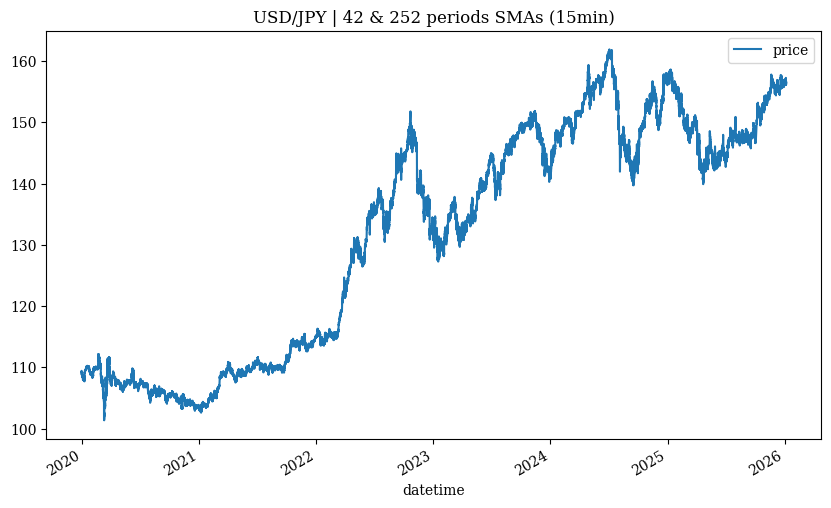

In [112]:
data.plot(title='USD/JPY | 42 & 252 periods SMAs (15min)', figsize=(10, 6))


In [113]:
# まず data に price を作る（すでにやってるならOK）
data['price'] = raw['<CLOSE>']

# ここで SMA を作る
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()

# そして position を作る
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)


In [114]:
print(data.head())
print(data.columns)

                       price  SMA1  SMA2  position
datetime                                          
2019-12-30 00:00:00  109.409   NaN   NaN        -1
2019-12-30 00:15:00  109.420   NaN   NaN        -1
2019-12-30 00:30:00  109.409   NaN   NaN        -1
2019-12-30 00:45:00  109.428   NaN   NaN        -1
2019-12-30 01:00:00  109.397   NaN   NaN        -1
Index(['price', 'SMA1', 'SMA2', 'position'], dtype='object')


In [115]:
#P89↓

In [116]:
data['position'] = np.where(data['SMA1'] > data['SMA2'],
                            1, -1)

data['position'] = data['position'].shift(1)   # ここが重要！

In [117]:
data.dropna(inplace=True)

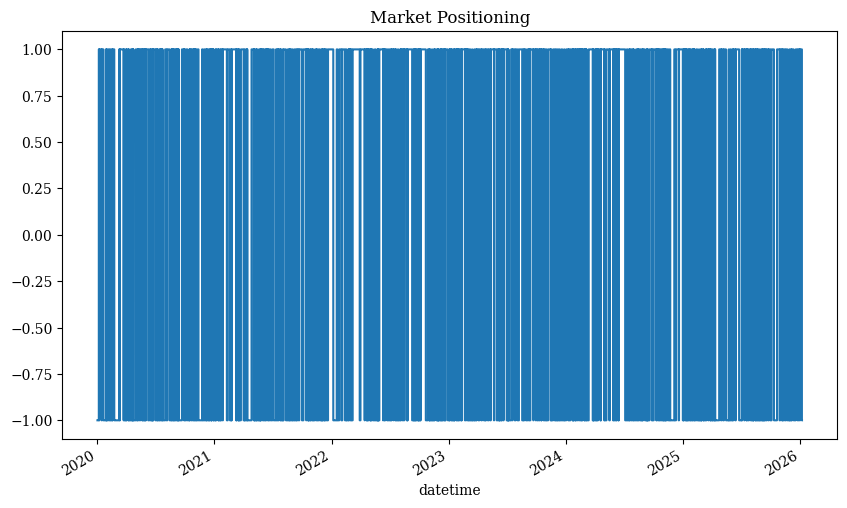

In [118]:
data['position'].plot(drawstyle='steps-post',
                      ylim=[-1.1, 1.1],
                      title='Market Positioning',
                      figsize=(10, 6));

In [120]:
#P89一旦保留↑

In [124]:
#P90↓対数収益率の度数分布

In [125]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))

<Axes: >

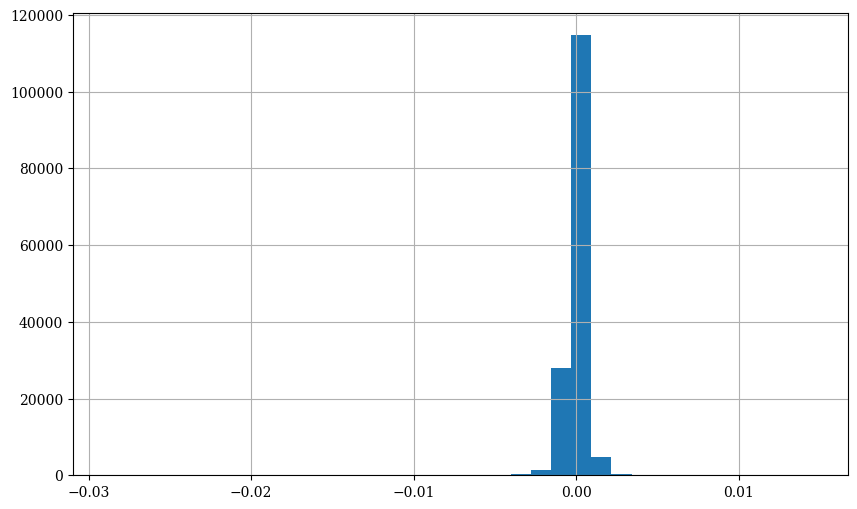

In [126]:
data['returns'].hist(bins=35, figsize=(10, 6))

In [ ]:
#P91↓

In [134]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [135]:
data[['returns', 'strategy']].sum()

returns     0.365441
strategy    0.451562
dtype: float64

In [136]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     1.441149
strategy    1.570763
dtype: float64

<Axes: xlabel='datetime'>

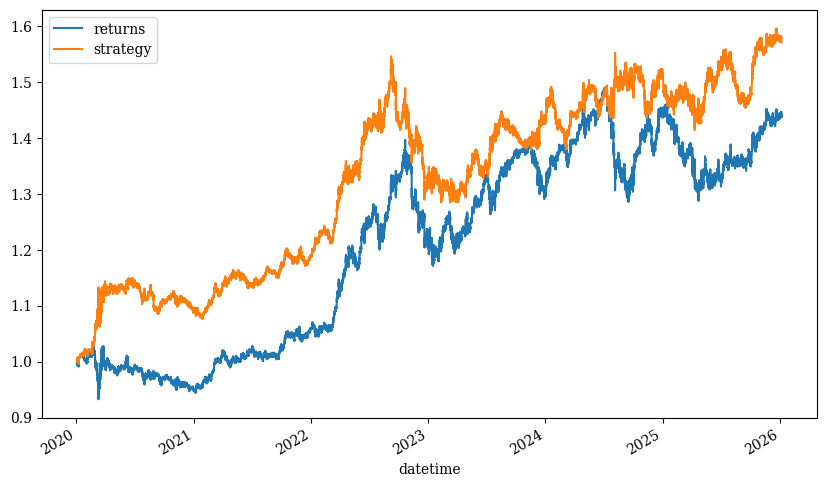

In [137]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [139]:
#P92↓

In [140]:
data[['returns', 'strategy']].mean() * 252

returns     0.000615
strategy    0.000760
dtype: float64

In [141]:
np.exp(data[['returns', 'strategy']].mean() * 252) - 1

returns     0.000615
strategy    0.000760
dtype: float64

In [166]:
data[['returns', 'strategy']].std() * 252 ** 0.5

returns     0.009583
strategy    0.009583
dtype: float64

In [144]:
(data[['returns', 'strategy']].apply(np.exp) - 1).std() * 252 ** 0.5

returns     0.009578
strategy    0.009581
dtype: float64

In [148]:
#P92↓

In [149]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

In [150]:
data['cummax'] = data['cumret'].cummax()

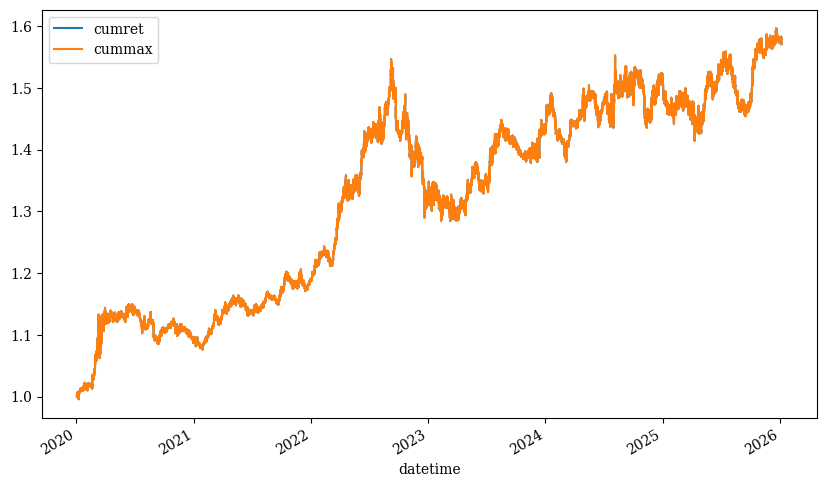

In [168]:
data[['cumret', 'cummax']].dropna().plot(figsize=(10, 6));

In [152]:
#P93↓

In [159]:
drawdown = data['cummax'] - data['cumret']

In [160]:
drawdown.max()

0.0

In [161]:
temp = drawdown[drawdown == 0]

In [162]:
periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())

In [163]:
periods[12:15]

array([datetime.timedelta(seconds=900), datetime.timedelta(seconds=900),
       datetime.timedelta(seconds=900)], dtype=object)

In [164]:
periods.max()

datetime.timedelta(days=3, seconds=900)